### Background

The **PAMAP2** Physical Activity Monitoring dataset, contains data of 18 different physical activities (such as walking, cycling, playing soccer etc) performed by 9 subjects wearing 3 inertial measurement units (IMU) and a heart rate monitor.

### Source

This data was stored in individual text files per subject. Each row in each file represents one reading and contains 54 attributes (including timestamp, activity ID, heart rate and IMU sensory data).

### Aim of the report

Assuming the goal is to develop hardware and/or software which can determine the amount (using start/end times and heart rates) and type of physical activity carried out by an individual, what actionable insights can you derive from the dataset?

### Specific Requirements

* carry out thorough exploratory data analysis and appropriately handle missing or dirty data;
* develop and test at least one hypothesis for a relationship between a single pair of attributes;
* develop and test at least one model which uses multiple attributes to make predictions.

### Introduction

The nature of physical activity can be categorized as aerobic activity promoting cardiovascular fitness or strength exercises promoting musculoskeletal fitness. Particularly in frail and elderly population, balanced activity of both types is important, on the one hand, for keeping functional independence, and on the other hand, as a basis for proper rehabilitation after a severe disease. It is then essential to promote the practice of physical activity especially at home, where adherence to exercise is demonstrably greater than when performed in centers, and where phase III rehabilitation takes place.

However, this physical activity has to be supervised in order to improve physical fitness whilst minimizing the risk of injury by incorrect execution or overuse. Moreover, this supervision of physical activity has to be achieved whilst providing feedback to the user, since this is required for preserving or increasing motivation and program adherence. The first integrated prototype of the PAMAP system provides this functionality for both categories of physical activity, thus supporting a holistic way of physical activity monitoring.

A new dataset **("PAMAP2")** recorded from 18 activities performed by 9 subjects, wearing 3 IMUs and a HR-monitor, is now also publicly available. 

## Overview

The given report is based on the dataset of **PAMAP2**. Basically, it is a physical activity monitoring dataset and it has various different activities (like lying, sitting, walking....). In total, it has 18 different physical activities. Also, these physical activities are taken by 9 different subjects, including 8 men and 1 woman. Moreover, the physical activities are taken using 3 inertial measurement units and one heart rate monitor as well. 

The conclusion of this report would be to get valuable insights from the results of our analysis to determine how active a subject is based on the physical activities participated which are supposed to be used to create hardware of software.
 
The three specific requirements of this assignments are:
* Carry out thoroughly exploratory data analysis and appropriately handle missing or dirty data
* Develop and tests at least one hypothesis for a relationship between a single pair of attributes
* Develop and test at least one model which uses multiple attributes to make predictions


This report will go through various steps including loading data, cleaning data, eda, hypothesis testing etc. The **PAMAP2** physical activity monitoring dataset will be analysed for the goal. the goal is to develop hardware and/or software which can determine the amount and type of physical activity carried out by an individual. Therefore, the data need to be munging and cleaning before exploratory data analysis.

Initially, I will read and analyse the data of description of activities and performed activities summary to primarily find out the effect about various subjects. Later on, data collection, munging and cleaning, it is important for after analysis of data. So that, we need handling missing values, data normalization and cleaning.

After handling missing values and normalization, data will be ready for exploratory data analysis of the relationship among the variables. In exploratory data analysis, I begin my analysis by splitting the data set into train and test.
I will show the relationships among the variables. Also, find the variable for further analysis.

Furthermore, after I analyse the correlation of the data. I will establish hypothesis testing between pair of attributes. Moreover, I will test two different types of hypotheses into different attributes. And find necessary information for the conclusion.

Finally, I will summarize the above report and build the model to predict physical activities. I will use principal component analysis before to develop a model. Henceforth, I will start my modelling with K-Means. I will distribute my dataset into cluster and use the elbow method to find out the necessary cluster required for the whole dataset. Further, I will find the K-means cluster for the dataset. After K-means model, I will run Logistic regression model to check the accuracy of data set with cross-validation.


### Preparatory Tasks

In [1]:
#execute to import the necessary libraries
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import math
from sklearn.model_selection import train_test_split

**Data Loading**

A list of the file names has to be created in order to load all the files and create the dataframe. Moreover, a dictionary that will hold the names as well as numbers of each different activity has to be created in order to be able to understand which activity is being analysed at each phase.

Lists for each different category of IMU's have to be put together as well in order to have the column names for the dataframe. IMU's that will be used are for chest, ankle and hand.

Then all the different lists have to be put together to create the collection of the columns.

In [2]:
# Load data
list_of_files = [r"C:\Users\Pramod\Downloads\PAMAP2_Dataset\PAMAP2_Dataset\Protocol\subject101.dat",
                 r"C:\Users\Pramod\Downloads\PAMAP2_Dataset\PAMAP2_Dataset\Protocol\subject102.dat",
                 r"C:\Users\Pramod\Downloads\PAMAP2_Dataset\PAMAP2_Dataset\Protocol\subject103.dat",
                 r"C:\Users\Pramod\Downloads\PAMAP2_Dataset\PAMAP2_Dataset\Protocol\subject104.dat",
                 r"C:\Users\Pramod\Downloads\PAMAP2_Dataset\PAMAP2_Dataset\Protocol\subject105.dat",
                 r"C:\Users\Pramod\Downloads\PAMAP2_Dataset\PAMAP2_Dataset\Protocol\subject106.dat",
                 r"C:\Users\Pramod\Downloads\PAMAP2_Dataset\PAMAP2_Dataset\Protocol\subject107.dat",
                 r"C:\Users\Pramod\Downloads\PAMAP2_Dataset\PAMAP2_Dataset\Protocol\subject108.dat",
                 r"C:\Users\Pramod\Downloads\PAMAP2_Dataset\PAMAP2_Dataset\Protocol\subject109.dat" ]

subjectID = [1,2,3,4,5,6,7,8,9]

activityIDdict = {0: 'transient',
              1: 'lying',
              2: 'sitting',
              3: 'standing',
              4: 'walking',
              5: 'running',
              6: 'cycling',
              7: 'Nordic_walking',
              9: 'watching_TV',
              10: 'computer_work',
              11: 'car driving',
              12: 'ascending_stairs',
              13: 'descending_stairs',
              16: 'vacuum_cleaning',
              17: 'ironing',
              18: 'folding_laundry',
              19: 'house_cleaning',
              20: 'playing_soccer',
              24: 'rope_jumping' }

colNames = ["timestamp", "activityID","heartrate"]

IMUhand = ['handTemperature', 
           'handAcc16_1', 'handAcc16_2', 'handAcc16_3', 
           'handAcc6_1', 'handAcc6_2', 'handAcc6_3', 
           'handGyro1', 'handGyro2', 'handGyro3', 
           'handMagne1', 'handMagne2', 'handMagne3',
           'handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4']

IMUchest = ['chestTemperature', 
           'chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 
           'chestAcc6_1', 'chestAcc6_2', 'chestAcc6_3', 
           'chestGyro1', 'chestGyro2', 'chestGyro3', 
           'chestMagne1', 'chestMagne2', 'chestMagne3',
           'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4']

IMUankle = ['ankleTemperature', 
           'ankleAcc16_1', 'ankleAcc16_2', 'ankleAcc16_3', 
           'ankleAcc6_1', 'ankleAcc6_2', 'ankleAcc6_3', 
           'ankleGyro1', 'ankleGyro2', 'ankleGyro3', 
           'ankleMagne1', 'ankleMagne2', 'ankleMagne3',
           'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4']

columns = colNames + IMUhand + IMUchest + IMUankle  #all columns in one list

len(columns)


54

In this section, the activity monitoring data for the different subjects are loaded into a dataframe for cleanup and preprocessing.

In [3]:
dataCollection = pd.DataFrame()
for file in list_of_files:
    procData = pd.read_table(file, header=None, sep='\s+')
    procData.columns = columns
    procData['subject_id'] = int(file[-5])
    dataCollection = dataCollection.append(procData, ignore_index=True)

dataCollection.reset_index(drop=True, inplace=True)
dataCollection.head()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


As it can be seen from the sample of the dataframe that we produced, there is some data cleaning required. For instance, activityID 0 must be removed completely from our dataset since this is transient period, where the subject was not doing any particular activity as discussed in the readme file that was given. Data cleaning will be discussed thoroughly in the following section.

### Data Cleaning

From a look at the PerformedActivitiesSummary file which is part of the collection of files given, it can be seen that various data is missing and as the readme file comments on, there were some wireless disconnections in data collection therefore the missing data has to be accounted for and made up in a way that our data analysis will not be impacted. More in depth, each different activity has 8 or less subjects which did the activity and each different activity has NaN values for various subjects. Therefore some data filling has be applied.

Let's get a bit insight about the data types.

In [4]:
dataCollection.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2872533 entries, 0 to 2872532
Data columns (total 55 columns):
 #   Column             Dtype  
---  ------             -----  
 0   timestamp          float64
 1   activityID         int64  
 2   heartrate          float64
 3   handTemperature    float64
 4   handAcc16_1        float64
 5   handAcc16_2        float64
 6   handAcc16_3        float64
 7   handAcc6_1         float64
 8   handAcc6_2         float64
 9   handAcc6_3         float64
 10  handGyro1          float64
 11  handGyro2          float64
 12  handGyro3          float64
 13  handMagne1         float64
 14  handMagne2         float64
 15  handMagne3         float64
 16  handOrientation1   float64
 17  handOrientation2   float64
 18  handOrientation3   float64
 19  handOrientation4   float64
 20  chestTemperature   float64
 21  chestAcc16_1       float64
 22  chestAcc16_2       float64
 23  chestAcc16_3       float64
 24  chestAcc6_1        float64
 25  chestAcc6_2       

Statistical information about the data

In [5]:
dataCollection.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,ankleOrientation1,ankleOrientation2,ankleOrientation3,ankleOrientation4,subject_id
count,2.872533e+06,2.872533e+06,262268.000000,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,2.859392e+06,...,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.860784e+06,2.872533e+06
mean,1.834354e+03,5.466243e+00,109.872508,3.265258e+01,-4.960786e+00,3.587758e+00,3.168417e+00,-4.889420e+00,3.584267e+00,3.349479e+00,...,-3.450122e-02,7.752030e-03,-3.272102e+01,1.593304e+00,1.689044e+01,3.986417e-01,2.154835e-02,3.091533e-01,-1.878725e-02,4.500478e+00
std,1.105689e+03,6.331333e+00,25.870036,1.844274e+00,5.985029e+00,6.277838e+00,3.843923e+00,5.992726e+00,6.055750e+00,3.840650e+00,...,5.966026e-01,1.842552e+00,1.887860e+01,2.161181e+01,2.030858e+01,3.034561e-01,5.691302e-01,3.237875e-01,4.731373e-01,2.367003e+00
min,5.640000e+00,0.000000e+00,57.000000,2.475000e+01,-1.453670e+02,-1.043010e+02,-1.014520e+02,-6.148950e+01,-6.186800e+01,-6.193470e+01,...,-1.812690e+01,-1.401960e+01,-1.728650e+02,-1.379080e+02,-1.092890e+02,-2.536280e-01,-9.568760e-01,-8.768380e-01,-9.972810e-01,1.000000e+00
25%,8.931600e+02,0.000000e+00,90.000000,3.143750e+01,-9.028420e+00,1.290268e+00,9.685817e-01,-8.933270e+00,1.284680e+00,1.164040e+00,...,-8.267092e-02,-3.084595e-01,-4.289480e+01,-1.148540e+01,3.289347e+00,1.563440e-01,-5.839910e-01,1.087023e-02,-5.047580e-01,2.000000e+00
50%,1.790830e+03,3.000000e+00,108.000000,3.312500e+01,-5.788145e+00,3.570830e+00,2.958415e+00,-5.737615e+00,3.613430e+00,3.132855e+00,...,-4.249850e-03,-2.216015e-03,-3.390020e+01,1.362615e+00,1.809105e+01,3.197555e-01,0.000000e+00,3.043820e-01,0.000000e+00,5.000000e+00
75%,2.710570e+03,7.000000e+00,125.000000,3.400000e+01,-7.829420e-01,6.602720e+00,6.002930e+00,-7.249920e-01,6.601960e+00,6.257612e+00,...,8.296868e-02,6.343258e-02,-1.905920e+01,1.733090e+01,3.087820e+01,5.794420e-01,6.279450e-01,6.020032e-01,4.634433e-01,7.000000e+00
max,4.475630e+03,2.400000e+01,202.000000,3.550000e+01,6.285960e+01,1.556990e+02,1.577600e+02,5.282140e+01,6.225980e+01,6.194460e+01,...,1.358820e+01,1.652880e+01,9.752550e+01,1.233060e+02,1.469000e+02,1.000000e+00,9.595380e-01,9.923540e-01,9.961050e-01,9.000000e+00


Removal of orientation columns as they are not needed

In [6]:
dataCollection = dataCollection.drop(['handOrientation1', 'handOrientation2', 'handOrientation3', 'handOrientation4',
                                             'chestOrientation1', 'chestOrientation2', 'chestOrientation3', 'chestOrientation4',
                                             'ankleOrientation1', 'ankleOrientation2', 'ankleOrientation3', 'ankleOrientation4'],
                                             axis = 1)

In [7]:
#check how many null values are there in a particular column
dataCollection.isnull().sum()

timestamp                 0
activityID                0
heartrate           2610265
handTemperature       13141
handAcc16_1           13141
handAcc16_2           13141
handAcc16_3           13141
handAcc6_1            13141
handAcc6_2            13141
handAcc6_3            13141
handGyro1             13141
handGyro2             13141
handGyro3             13141
handMagne1            13141
handMagne2            13141
handMagne3            13141
chestTemperature       3563
chestAcc16_1           3563
chestAcc16_2           3563
chestAcc16_3           3563
chestAcc6_1            3563
chestAcc6_2            3563
chestAcc6_3            3563
chestGyro1             3563
chestGyro2             3563
chestGyro3             3563
chestMagne1            3563
chestMagne2            3563
chestMagne3            3563
ankleTemperature      11749
ankleAcc16_1          11749
ankleAcc16_2          11749
ankleAcc16_3          11749
ankleAcc6_1           11749
ankleAcc6_2           11749
ankleAcc6_3         

In [8]:
dataCollection=dataCollection.drop_duplicates()
dataCollection


,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
0,8.38,0,104.0,30.0000,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,9.64689,-1.555760,0.310404,0.008300,0.009250,-0.017580,-61.1888,-38.95990,-58.143800,1
1,8.39,0,NaN,30.0000,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,9.61670,-1.616300,0.280488,-0.006577,-0.004638,0.000368,-59.8479,-38.89190,-58.525300,1
2,8.40,0,NaN,30.0000,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,9.63173,-1.586050,0.280311,0.003014,0.000148,0.022495,-60.7361,-39.41380,-58.399900,1
3,8.41,0,NaN,30.0000,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,9.63197,-1.631350,0.340997,0.003175,-0.020301,0.011275,-60.4091,-38.76350,-58.395600,1
4,8.42,0,NaN,30.0000,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,9.64699,-1.646470,0.340965,0.012698,-0.014303,-0.002823,-61.5199,-39.38790,-58.269400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2872528,100.19,0,NaN,25.1875,-4.71493,10.22250,4.66893,-5.04654,9.94944,4.50736,...,9.09401,-0.228554,-2.687700,-0.037788,-0.062676,-0.127084,-46.5153,3.58240,-0.035995,9
2872529,100.20,0,NaN,25.1875,-4.95932,10.37130,4.12594,-4.96890,10.29620,4.43102,...,9.27291,-0.607010,-2.990140,-0.068904,-0.027006,-0.089808,-45.7474,3.54453,0.108583,9
2872530,100.21,0,NaN,25.1875,-4.93997,9.83615,3.70468,-5.04613,10.35690,4.14405,...,9.43813,-0.697724,-2.990720,-0.070888,-0.038024,-0.064709,-46.3997,4.22078,0.105504,9
2872531,100.22,0,NaN,25.1875,-4.64941,9.11129,3.51904,-5.06854,9.75268,3.87359,...,9.49875,-0.576563,-2.870350,0.018961,-0.025796,-0.064357,-46.5282,4.48593,0.530240,9


In [9]:
dataCollection.isnull().sum().sort_values(ascending=False)/len(dataCollection)*100
# Checked null values percentage wise

heartrate           90.869800
handMagne3           0.457471
handMagne1           0.457471
handGyro3            0.457471
handGyro2            0.457471
handGyro1            0.457471
handAcc6_3           0.457471
handAcc6_2           0.457471
handAcc6_1           0.457471
handAcc16_3          0.457471
handAcc16_2          0.457471
handAcc16_1          0.457471
handTemperature      0.457471
handMagne2           0.457471
ankleAcc16_1         0.409012
ankleAcc16_2         0.409012
ankleAcc16_3         0.409012
ankleAcc6_1          0.409012
ankleAcc6_2          0.409012
ankleAcc6_3          0.409012
ankleGyro1           0.409012
ankleMagne3          0.409012
ankleGyro2           0.409012
ankleGyro3           0.409012
ankleMagne1          0.409012
ankleMagne2          0.409012
ankleTemperature     0.409012
chestAcc6_2          0.124037
chestTemperature     0.124037
chestAcc16_1         0.124037
chestAcc16_2         0.124037
chestAcc16_3         0.124037
chestAcc6_1          0.124037
chestGyro1

In [10]:
dataCollection=dataCollection[dataCollection['heartrate'].notnull()]
dataCollection.isnull().sum().sort_values(ascending=False)/len(dataCollection)*100

handTemperature     0.455641
handMagne3          0.455641
handMagne1          0.455641
handGyro3           0.455641
handGyro2           0.455641
handGyro1           0.455641
handAcc6_3          0.455641
handAcc6_2          0.455641
handAcc6_1          0.455641
handAcc16_3         0.455641
handAcc16_2         0.455641
handAcc16_1         0.455641
handMagne2          0.455641
ankleAcc16_1        0.387390
ankleAcc16_2        0.387390
ankleAcc16_3        0.387390
ankleAcc6_1         0.387390
ankleAcc6_2         0.387390
ankleAcc6_3         0.387390
ankleGyro1          0.387390
ankleGyro2          0.387390
ankleMagne3         0.387390
ankleGyro3          0.387390
ankleMagne1         0.387390
ankleMagne2         0.387390
ankleTemperature    0.387390
chestAcc6_2         0.112480
chestTemperature    0.112480
chestAcc16_1        0.112480
chestAcc16_2        0.112480
chestAcc16_3        0.112480
chestAcc6_1         0.112480
chestGyro1          0.112480
chestGyro2          0.112480
chestGyro3    

In [11]:
dataCollection = dataCollection.drop(dataCollection[dataCollection.activityID == 0].index) #removal of any row of activity 0 as it is transient activity which it is not used
dataCollection = dataCollection.interpolate() #removal of any remaining NaN value cells by constructing new data points in k

It is clear that there are no missing values but we can check just to be sure.

In [12]:
dataCollection.isnull().sum()

timestamp           0
activityID          0
heartrate           0
handTemperature     0
handAcc16_1         0
handAcc16_2         0
handAcc16_3         0
handAcc6_1          0
handAcc6_2          0
handAcc6_3          0
handGyro1           0
handGyro2           0
handGyro3           0
handMagne1          0
handMagne2          0
handMagne3          0
chestTemperature    0
chestAcc16_1        0
chestAcc16_2        0
chestAcc16_3        0
chestAcc6_1         0
chestAcc6_2         0
chestAcc6_3         0
chestGyro1          0
chestGyro2          0
chestGyro3          0
chestMagne1         0
chestMagne2         0
chestMagne3         0
ankleTemperature    0
ankleAcc16_1        0
ankleAcc16_2        0
ankleAcc16_3        0
ankleAcc6_1         0
ankleAcc6_2         0
ankleAcc6_3         0
ankleGyro1          0
ankleGyro2          0
ankleGyro3          0
ankleMagne1         0
ankleMagne2         0
ankleMagne3         0
subject_id          0
dtype: int64

As we can see, there are no more missing values. We can now move into Exploratory Data Analysis.

## Exploratory Data Analysis

#### Splitting Data in Train and Test sets

Before splitting our data, it is best if we first check if the classes are balanced which would imply that stratification is not needed for our split. If classes' weights are unbalanced, we should proceed with stratifying while splitting the data. Stratified sampling is the process of taking samples of all classes and putting them on the sub-sets created for train and test sets. It helps with getting better results when the distribution of the weights of the classes is not normal. Normal distribution would imply that each class' weight is similar with all other weights of classes. 

### Check class distribution/ratios
Check if our dataset is balanced

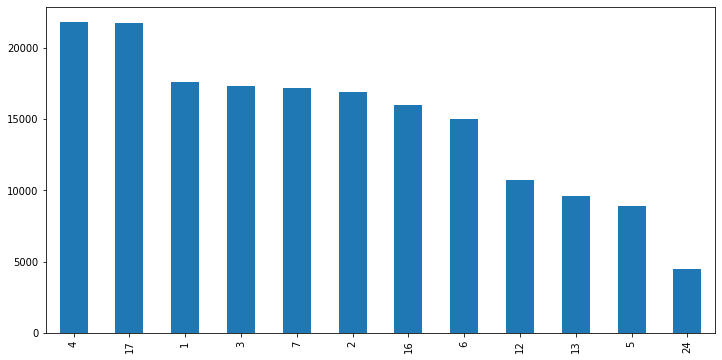

In [13]:
dataCollection['activityID'].value_counts().plot(kind = "bar",figsize = (12,6))
plt.show()

As the above plot shows, our classes are mostly balanced. Therefore, we proceed with splitting the data into train and test sets. The most common split in the industry is a 80% split for train set and 20% for test set, which is the split fraction that will be used.

In [14]:
train_dc = dataCollection.sample(frac=0.8, random_state=1)
test_dc = dataCollection.drop(train_dc.index)

We need to check some statistics/insights from the describe method from pandas as it can provide further results that we need to know as to how our data is being processed for our analysis.

In [15]:
train_dc.describe()

,timestamp,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,subject_id
count,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,...,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000,141926.000000
mean,1705.094311,8.078034,107.490044,32.749716,-4.977467,3.570503,3.596709,-4.916795,3.559751,3.782042,...,9.378984,-0.022336,-2.168958,0.011896,-0.034991,0.015088,-31.593739,1.441031,17.240547,4.565569
std,1093.879660,6.175274,26.990819,1.794006,6.253213,6.960136,3.959058,6.257220,6.616139,3.946528,...,6.115524,7.158864,3.514026,1.116391,0.635209,2.013031,18.388400,21.650085,19.706121,2.335595
min,31.220000,1.000000,57.000000,24.875000,-94.135900,-82.550900,-69.093500,-60.987400,-61.812200,-51.202300,...,-61.142000,-61.906400,-62.180000,-11.125300,-6.234040,-11.539700,-172.236000,-135.604000,-100.864000,1.000000
25%,742.772500,3.000000,86.000000,31.687500,-8.971937,1.049238,1.163045,-8.867675,1.049783,1.362355,...,8.407315,-2.055722,-3.407732,-0.203474,-0.105847,-0.435901,-41.735975,-12.387700,3.815785,2.000000
50%,1479.530000,6.000000,105.000000,33.125000,-5.460830,3.522890,3.408160,-5.398395,3.567965,3.648250,...,9.554695,-0.211168,-1.990025,0.005077,-0.003694,-0.002087,-33.970150,0.817137,18.766850,5.000000
75%,2665.130000,13.000000,124.000000,34.062500,-0.972719,6.455213,6.531560,-0.930067,6.452333,6.775960,...,10.294300,1.930665,-0.588462,0.133465,0.116950,0.093239,-17.898775,17.860275,31.186375,7.000000
max,4245.650000,24.000000,202.000000,35.500000,60.912600,155.354000,65.302700,31.935200,62.247100,56.449300,...,61.922600,62.034800,58.690600,12.628500,6.410380,14.288100,82.818800,86.917500,138.163000,9.000000


Now We are going to concentrate more on heart rate as it is our most precice meter of check for tracking subjects during activities as implied by the various indications on the readme file of the dataset. Taking this in mind and checking at the table, we can find that the mean heart rate throughout the dataset is 107.4. Furthermore the minimum heart rate is 57 and the maximum heart rate is 202.

The quartiles that are shown can be further analysed by plotting a box plot which will help with understanding our outliers and quartiles groups and also shown the mean of our data's heart rate.

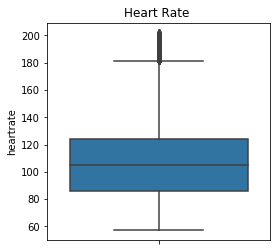

In [16]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(4,4))
plt.title("Heart Rate ")
ax = sns.boxplot(y=train_dc["heartrate"])

If we look to the box plot, we can see that the outliers have heart rate from 180 up to 204. The highest quartile group out of the four starts around 124, which is the end of the Inter-quartile range and finishes at 180. which also makes it our biggest group by looking at the size of it on the box plot compared to the other quartiles. It means that the frequent amount of subjects on the activities performed had heart rate of 124 up to 180.

the third quartile group starts from the mean value which is 107.4 which is where the horizontal line in our box is, and finishes at the end of the Inter-quartile range which is 124. 

the second quartile group, starts from the start of the Inter-quartile range which is 86 and ends at the mean value 124. 

the first quartile group starts from the lowest data point, 57 and ends at the start of the Inter-quartile range 86. 

To find the most challenging activities, we have to plot a bar chart, which will show the mean values of heart rate for each activity that has performed. This will in return help us to analyse further particular activity data. The names of the activities will be used for easier analysis of results.

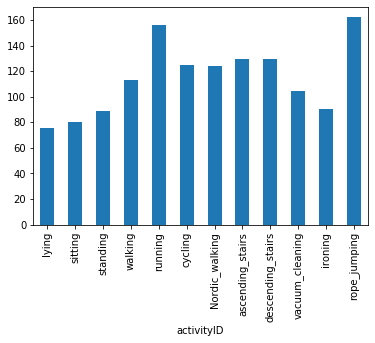

In [17]:
df_h_act = train_dc['heartrate'].groupby(train_dc['activityID']).mean()
df_h_act.index = df_h_act.index.map(activityIDdict)
df_h_act.plot(kind='bar')

The bar chart depicts that Rope Jumping and Running are the most challenging activities out of all the activities.

To check further on our data set to find any anormalities, we need to plot a heat map which will show whether our data has correlations inbetween it. All columns will be used in order to understand the extend of problems, if there are any.

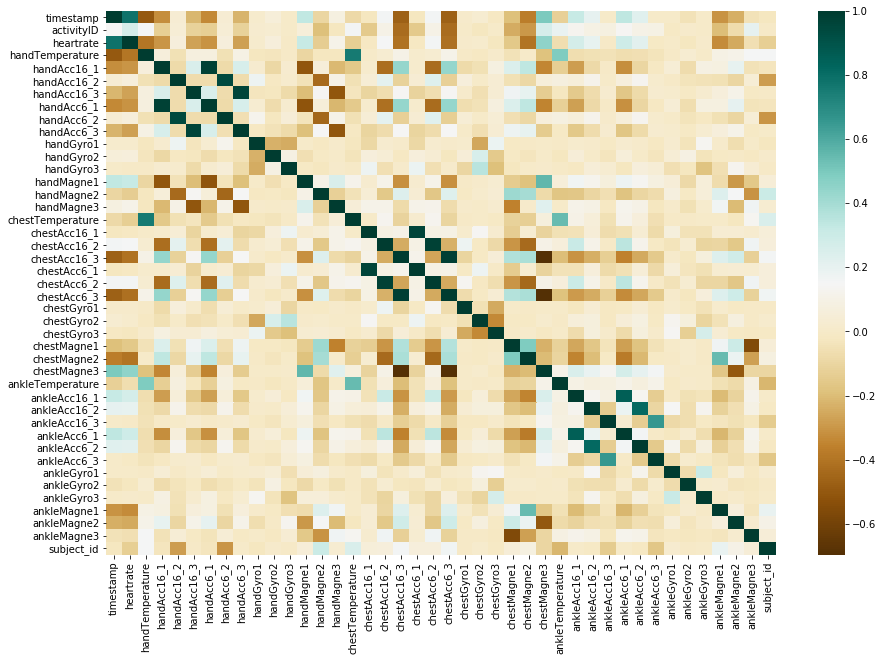

In [18]:
from pandas.plotting import scatter_matrix
dc_corr = train_dc.corr()
dc_corr = dc_corr.drop(['activityID'], axis = 1)

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(dc_corr, mask=np.zeros_like(dc_corr, dtype=np.bool), cmap = "BrBG",ax=ax)
plt.show()

The above heat-map clearly showing the statistical similarity between the different columns. It is clearly observe that the **gyroscopes** does not correlate with any of the data set. So we can drop it out for our further analysis.

Moreover, the correlation in between **accelerometers of hand and temperature.** They both are positively correlated.

Also, the **chest Magnetometers** seem to be correlated with **heart rate** and it is very evident as they both are very close together on the body.

Number of each activity



,value_counts
4,21786
17,21770
1,17600
3,17350
7,17198
2,16929
16,16028
6,15044
12,10709
13,9593


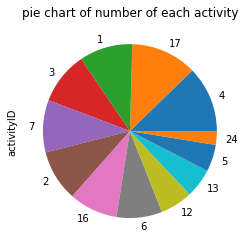

In [19]:
print('Number of each activity\n')
plt.title('pie chart of number of each activity')
dataCollection.activityID.value_counts().plot(kind='pie')
dataCollection.activityID.agg(['value_counts'])

From above table and pie chart, they both depict that values counts of **activity 4(walking)** was greater than other activities . Moreover, values counts of **ironing** and **lying** were occupied second and thrid place respectivitly. Howover, values counts of rope jumping was smaller than others.

In [20]:
def box_plot(name1,name2,name3,name4,titlename1,titlename2,titlename3):
  plt.figure(figsize=(5,3))
  plt.subplots_adjust(2,1,5,2)
  plt.subplot(131)
  dat1=dataCollection[['activityID',name1]]
  dat1.activityID=dat1.activityID.astype("category")
  plt.xticks(rotation=40)
  sns.boxplot(x='activityID',y=name1,data=dat1)
  plt.ylabel(name4)
  plt.xlabel('Activities')
#   plt.title('Activities and Temperature of chest')
  plt.title(titlename1)

  plt.subplot(132)
  dat1=dataCollection[['activityID',name2]]
  dat1.activityID=dataCollection.activityID.astype("category")
  plt.xticks(rotation=40)
  sns.boxplot(x='activityID',y=name2,data=dat1)
  plt.ylabel(name4)
  plt.xlabel('Activities')
#   plt.title('Activities and Temperature of hand')
  plt.title(titlename2)

  plt.subplot(133)
  dat1=dataCollection[['activityID',name3]]
  dat1.activityID=dataCollection.activityID.astype("category")
  plt.xticks(rotation=40)
  sns.boxplot(x='activityID',y=name3,data=dat1)
  plt.ylabel(name4)
  plt.xlabel('Activities')
#   plt.title('Activities and Temperature of ankle')
  plt.title(titlename3)

C:\Users\Pramod\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Pramod\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Pramod\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

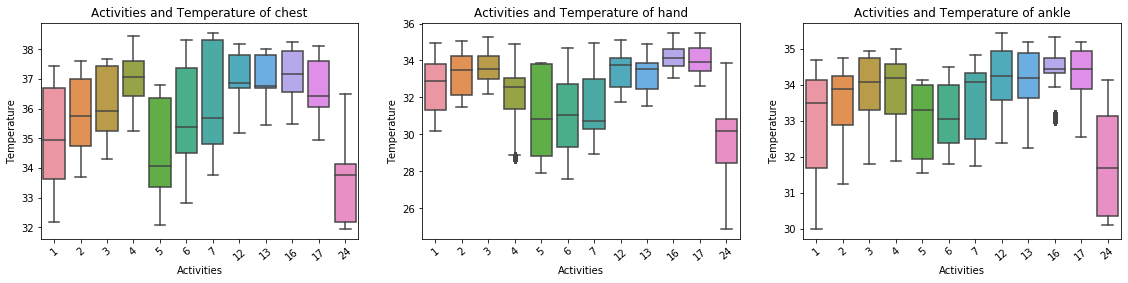

In [21]:
box_plot('chestTemperature','handTemperature','ankleTemperature','Temperature','Activities and Temperature of chest','Activities and Temperature of hand','Activities and Temperature of ankle')

According to the above three box plot, they show that different types of activties have obvious different average and median. Therefore, different types of activities have an influence on temperature of **hand, chest and ankle**. Therefore, we can use different temperature to predict type of activities and vice versa. Different types of activities also can predct temperature.

## Hypothesis Testing

* **Hypothesis(1)**

The most hefty activities seem to be running and rope jumping as seen from bar charts plotted in EDA. Therefore our hypothesis testing will be based on these two activities and how their heart rate data correlates with the rest of the activities heart rates. This will be done by getting the mean heart rate of the two activities and them comparing it to the mean heart rate of all activities.

**Null Hypothesis:**

h0 : The mean heart rate of the hefty activities has no mass difference from the mean of all activities

**Alternate Hypothesis:**

h1 : The mean heart rate of the hefty activities has mass difference from the mean of all activities

In [22]:
run_data = train_dc.loc[(train_dc["activityID"] == 5)]
rope_data = train_dc.loc[(train_dc["activityID"] == 24)]
hefty_data = run_data + rope_data

In [23]:
import scipy.stats

p = train_dc['heartrate'].mean() / (run_data['heartrate'].std() / math.sqrt( run_data['heartrate'].count() ))
pValue = 1 - scipy.stats.norm.cdf(p)

if pValue > 0.1:
    print("The p_value is ", pValue, " and h1 is rejected. There is no significant difference between the means of hefty activities and all activities.")
else:
    print("The p_value is ", pValue, " and h0 is rejected. There is significant difference between the means of hefty activities and all activities.")


The p_value is  0.0  and h0 is rejected. There is significant difference between the means of hefty activities and all activities.


After making sure that our hypothesis is not null(It is alternate one), proving that the mean of the heart rate of the two most hefty activities is in fact very different from the mean heart rate of all the activities. 

Completing the previous exercise, the next hypothesis to be tested will be whether the There is a relationship between temperature of chest and other attribute of chest. Also, suitable data for testing is extracted from the test dataset. 

* **Hypothesis(2)**

For the hypothesis testing, we need to use stratified sampling to recollect the data. The reason is that each types of activities have a same sample size for T test and p-value. Moreover, p value was Inaccurate for huge amounts of original data size. According to the law of large numbers, I will use each type of activities that there were have 300 data size for hypothesis testing.

**Null hypthesis**
H0 : There is a relationship between temperature of chest and other attribute of chest

**Alternate Hypothesis**

H1: There is not a relationship between temperature of chest and other attribute of chest

Assumed that the significance level is 0.001 (LOS)

Hence we will check our p-value around 0.001.

If incase, if the p-value comes less than LOS, We will accept the fact that the there is a relationship between temperature of chest and other attribute of chest. Else, We will go for the alternate hypothesis.

In [24]:
from scipy import stats

In [25]:
def get_sample(df, sampling="simple_random", k=1, stratified_col=None):

    import random
    import pandas as pd
    from functools import reduce
    import numpy as np
    import math
    
    len_df = len(dataCollection)
    if k <= 0:
        raise AssertionError("k can not be negative")
    elif k >= 1:
        assert isinstance(k, int), "k must be positive"
        sample_by_n=True
        if sampling is "stratified":
            alln=k*dataCollection.groupby(by=stratified_col)[stratified_col[0]].count().count() 
            #alln=k*dataCollection[stratified_col].value_counts().count() 
            if alln >= len_df:
                raise AssertionError("please make sure that K times the number of layers does not exceed the total sample size.")
    else:
        sample_by_n=False
        if sampling in ("simple_random", "systematic"):
            k = math.ceil(len_df * k)
    if sampling is "simple_random":
        print("simple")
        idx = random.sample(range(len_df), k)
        res_df = dataCollection.iloc[idx,:].copy()
        return res_df
    elif sampling is "systematic":
        print("system simple")
        step = len_df // k+1          #step=len_df//k-1
        start = 0                  #start=0
        idx = range(len_df)[start::step]  #idx=range(len_df+1)[start::step]
        res_df = dataCollection.iloc[idx,:].copy()
        #print("k=%d,step=%d,idx=%d"%(k,step,len(idx)))
        return res_df
    elif sampling is "stratified":
        assert stratified_col is not None, "Upload a list of column names that need to be hierarchical"
        assert all(np.in1d(stratified_col, df.columns)), "plese check your input column name"
        
        grouped = dataCollection.groupby(by=stratified_col)[stratified_col[0]].count()
        if sample_by_n==True:
            group_k = grouped.map(lambda x:k)
        else:
            group_k = grouped.map(lambda x: math.ceil(x * k))
        
        res_df = dataCollection.head(0)
        for df_idx in group_k.index:
            df1=dataCollection
            if len(stratified_col)==1:
                df1=df1[df1[stratified_col[0]]==df_idx]
            else:
                for i in range(len(df_idx)):
                    df1=df1[df1[stratified_col[i]]==df_idx[i]]
            idx = random.sample(range(len(df1)), group_k[df_idx])
            group_df = df1.iloc[idx,:].copy()
            res_df = res_df.append(group_df)
        return res_df
    else:
        raise AssertionError("sampling is illegal")

In [26]:
dat01=get_sample(dataCollection,sampling="stratified", k=300, stratified_col=['activityID'])

In [27]:
dat01.columns[17:29]

Index(['chestAcc16_1', 'chestAcc16_2', 'chestAcc16_3', 'chestAcc6_1',
       'chestAcc6_2', 'chestAcc6_3', 'chestGyro1', 'chestGyro2', 'chestGyro3',
       'chestMagne1', 'chestMagne2', 'chestMagne3'],
      dtype='object')

In [28]:
print('P value and T test of heart rate and temperature:',stats.ttest_ind(dat01['handTemperature'].values,dat01['heartrate'].values))

P value and T test of heart rate and temperature: Ttest_indResult(statistic=-158.01686271511525, pvalue=0.0)


In [29]:
for anum in dat01.columns[17:29]:
  print('P value and T test of '+anum+ ' temperature:',stats.ttest_ind(dat01['handTemperature'].values,dat01[anum].values))

P value and T test of chestAcc16_1 temperature: Ttest_indResult(statistic=679.8325179983373, pvalue=0.0)
P value and T test of chestAcc16_2 temperature: Ttest_indResult(statistic=220.34327246155877, pvalue=0.0)
P value and T test of chestAcc16_3 temperature: Ttest_indResult(statistic=396.95358052359694, pvalue=0.0)
P value and T test of chestAcc6_1 temperature: Ttest_indResult(statistic=681.2420599008675, pvalue=0.0)
P value and T test of chestAcc6_2 temperature: Ttest_indResult(statistic=221.53072430283706, pvalue=0.0)
P value and T test of chestAcc6_3 temperature: Ttest_indResult(statistic=392.3405243508155, pvalue=0.0)
P value and T test of chestGyro1 temperature: Ttest_indResult(statistic=919.5581862854931, pvalue=0.0)
P value and T test of chestGyro2 temperature: Ttest_indResult(statistic=910.7740933584166, pvalue=0.0)
P value and T test of chestGyro3 temperature: Ttest_indResult(statistic=944.0367435893749, pvalue=0.0)
P value and T test of chestMagne1 temperature: Ttest_indResul

According to the above results of p value of temperature and other attribute, all p values is smaller than 0.001. Therefore these attribute is relate the temperature of chest.

Hence, we can move on into Modelling where we will be looking at different modelling algorithms and will be choosing one as the modelling algorithm that would be used after testing.

## Modelling

### Dimensionality reduction using Principal Component Analysis(PCA)

The principal components of a collection of points in a real coordinate space are a sequence of a unit vector. A best-fitting line is defined as one that minimizes the average squared distance from the points to the line. These directions constitute an orthonormal basis in which different individual dimensions of the data are linearly uncorrelated. Principal component analysis (PCA) is the process of computing the principal components and using them to perform a change of basis on the data, sometimes using only the first few principal components and ignoring the rest.

PCA is used in exploratory data analysis and for making predictive models. It is commonly used for dimensionality reduction by projecting each data point onto only the first few principal components to obtain lower-dimensional data while preserving as much of the data's variation as possible. The first principal component can equivalently be defined as a direction that maximizes the variance of the projected data. 

In [83]:
train_dc = train_dc.drop(["timestamp", "subject_id"],1)

In [84]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler,RobustScaler

#apply scaling to all columns except subject and activity 
scaler = RobustScaler()
df_scaled = train_dc.copy()
df_scaled_test = test_dc.copy()

df_scaled.iloc[:,1:41] = scaler.fit_transform(df_scaled.iloc[:,1:41])
df_scaled_test.iloc[:,1:41] = scaler.fit_transform(df_scaled_test.iloc[:,1:41])

df_scaled.head()

,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc16_3,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3
68817,3,-0.184211,-0.052632,1.085261,1.066579,-0.523858,1.098990,1.057513,-0.570652,-0.047601,...,0.628625,0.007851,-0.511983,0.639746,0.088991,-0.018338,0.000325,-2.667576,-0.889476,0.864474
2773370,7,0.315789,-1.026316,0.765732,-1.179732,-0.193581,0.755638,-1.158126,-0.280772,0.458850,...,-0.168983,-0.531114,-0.380036,-0.271579,2.302984,1.166591,1.439370,-0.429524,-0.242796,-0.095509
2622702,12,-0.184211,0.526316,-1.269145,-0.825163,-0.863913,-1.283246,-0.882630,-0.825042,-2.311741,...,-0.016686,-0.594533,-1.400547,-0.127134,13.266368,-5.752061,2.609494,-0.664598,1.509135,-0.994947
331735,5,1.789474,-1.157895,-0.634796,-0.017446,-0.759301,-0.708829,0.223904,-0.766956,1.327298,...,0.067232,8.238754,0.657281,0.395796,-4.914830,6.109190,-0.293518,-0.584840,-1.383145,-1.141483
1747730,5,1.473684,0.289474,2.041316,-0.688296,-0.876520,2.243118,-0.732820,-0.914341,-1.092559,...,1.243552,-2.649854,5.545564,-1.031854,1.086421,-4.541725,-5.145980,0.005196,1.013336,0.121852


In [85]:
X_train = df_scaled.drop('activityID', axis=1).values
y_train = df_scaled['activityID'].values

# Test Dataset
X_test = df_scaled.drop('activityID', axis=1).values
y_test = df_scaled['activityID'].values

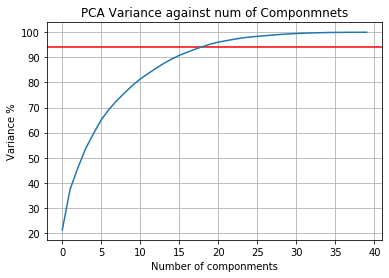

In [86]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(X_train)
var= pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

plt.title("PCA Variance against num of Componmnets")
plt.ylabel("Variance %")
plt.xlabel("Number of componments")
l = plt.axhline(94, color="red")

plt.plot(var1)
plt.grid()


Usually 90-98% of the variance will explain our data really well. So by plotting the variance ratio aginst the number of componments we could see how many of those we could use. As we see from the graph above around 15 componments fall around to 94% of the variance.

### K-Means Clustering model

If a dataset do not have any labels associated with it, then unsupervised algorithms are used to find some structure in it. These structures can be different types of data pattern or group of data. **K-Means clustering** is most commonly used unsupervised learning algorithm to find groups in unlabeled data. Here K represents the number of groups or clusters and the process of creating these groups is known as 'clustering', that why the name K-means clustering.

Some variables have to be dropped which would impact our modelling precision and analysis. The variables to be dropped are timestamp and subject_id as they both are numeric numbers, which would our modelling method would use in its calculations but since their values don't have any meaning, the modelling method used would have noise and predictions of accuracy would be innacurate. Hence, it is recommended to exclued them for model development and testing. 

In [39]:
dataCollection = dataCollection.drop(["timestamp", "subject_id"],1)

In [40]:
from sklearn.cluster import KMeans

In [66]:
X=dataCollection.iloc[:, 1:41].values

**Choosing The Number of Clusters**

We actually do not know the number of clusters. There are several methods to select k that depends on the domain knowledge and rule of thumbs.

**Elbow method**

Elbow method is one of the robust one used to find out the optimal number of clusters. In this method, the sum of distances of observations from their cluster centroids, called **Within-Cluster-Sum-of-Squares (WCSS)**. 

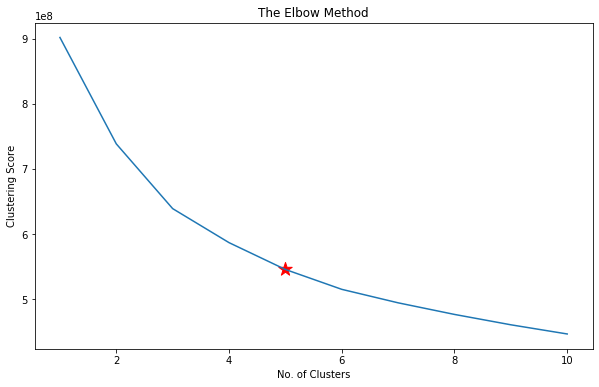

In [67]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'random', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_) # inertia_ = Sum of squared distances of samples to their closest cluster center.
  #this loop will fit the k-means algorithm to our data and 
#second we will compute the within cluster sum of squares and #appended to our wcss list.


#i above is between 1-10 numbers. init parameter is the random #initialization method  
#we select kmeans++ method. max_iter parameter the maximum number of iterations there can be to 
#find the final clusters when the K-meands algorithm is running. we #enter the default value of 300
#the next parameter is n_init which is the number of times the #K_means algorithm will be run with
#different initial centroid.


#Plot the elbow graph

plt.figure(figsize=(10,6))
plt.plot(range(1, 11), wcss)
plt.scatter(5,wcss[4], s = 200, c = 'red', marker='*')
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('Clustering Score')
plt.show()

In [69]:
kmeans= KMeans(n_clusters = 5, random_state = 42)

# Compute k-means clustering
kmeans.fit(X)

# Compute cluster centers and predict cluster index for each sample.
pred = kmeans.predict(X)


In [70]:
pred

array([0, 0, 0, ..., 4, 4, 4])

In [71]:
dataCollection['Cluster'] = pd.DataFrame(pred, columns=['cluster'] )
print('Number of data points in each cluster= \n', dataCollection['Cluster'].value_counts())
dataCollection

Number of data points in each cluster= 
 3.0    3357
4.0    2887
1.0    2808
0.0    2010
2.0     915
Name: Cluster, dtype: int64


,activityID,heartrate,handTemperature,handAcc16_1,handAcc16_2,handAcc16_3,handAcc6_1,handAcc6_2,handAcc6_3,handGyro1,...,ankleAcc6_1,ankleAcc6_2,ankleAcc6_3,ankleGyro1,ankleGyro2,ankleGyro3,ankleMagne1,ankleMagne2,ankleMagne3,Cluster
2932,1,100.0,30.375,2.30106,7.25857,6.09259,2.20720,7.24042,5.95555,-0.069961,...,9.64677,-1.75240,0.295902,0.001351,-0.048878,-0.006328,-60.2040,-37.122500,-57.884700,1.0
2943,1,100.0,30.375,2.24615,7.48180,5.55219,2.25130,7.40595,5.65313,-0.431227,...,9.63201,-1.72208,0.356423,0.005819,-0.017912,0.015243,-60.7820,-36.211600,-58.489100,1.0
2954,1,100.0,30.375,2.30000,7.10681,6.09309,2.34613,7.46611,6.12103,0.075692,...,9.58668,-1.75241,0.296221,0.015376,-0.011798,0.011387,-61.4531,-36.298300,-58.484500,1.0
2965,1,100.0,30.375,2.49455,7.52335,6.17157,2.59106,7.76653,6.27112,-0.259058,...,9.64714,-1.76741,0.386759,-0.012672,-0.009233,0.005823,-62.0065,-36.721700,-58.360800,1.0
2976,1,101.0,30.375,2.71654,8.30596,4.78671,2.59596,7.94641,4.86635,0.377115,...,9.64678,-1.73728,0.295853,0.050959,-0.042562,-0.009289,-60.4311,-37.541200,-59.001300,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2871975,24,162.0,25.125,4.78601,6.75444,7.05521,4.71052,6.72462,6.64876,-0.092524,...,9.44333,-2.13294,-1.639100,-0.022888,0.020064,-0.022287,-46.0304,-1.464080,-0.453931,NaN
2871986,24,162.0,25.125,4.34732,6.90337,6.35537,4.39582,6.96850,6.61834,-0.303158,...,9.35297,-2.25402,-1.683640,-0.002293,-0.004692,0.009044,-45.5269,-0.843791,0.114449,NaN
2871997,24,162.0,25.125,4.70704,6.59291,5.89995,4.70308,6.48243,5.99996,0.064261,...,9.38312,-2.10274,-1.669150,-0.029348,-0.020501,-0.036864,-45.6476,-1.094840,0.256148,NaN
2872007,24,162.0,25.125,4.81452,6.51482,5.74788,4.89736,6.49594,5.78832,-0.191101,...,9.44267,-1.99702,-1.806020,-0.036682,-0.011895,-0.017897,-45.9167,-0.437698,0.254439,NaN


### Visualising the clusters

Text(0.5, 1.0, 'PAMAP2 Clusters')

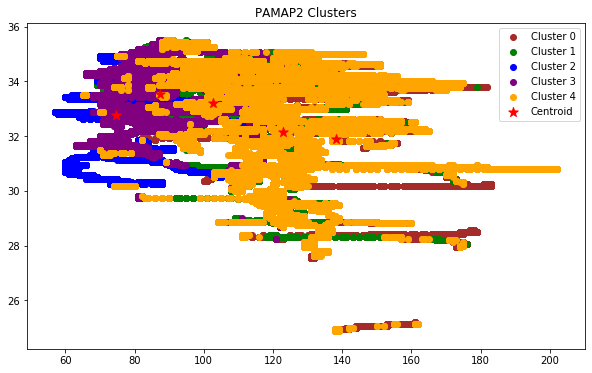

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], c = 'brown', label = 'Cluster 0')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], c = 'green', label = 'Cluster 1')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], c = 'blue', label = 'Cluster 2')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], c = 'purple', label = 'Cluster 3')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], c = 'orange', label = 'Cluster 4')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:, 1],s = 100, c = 'red', label = 'Centroid', marker='*')

plt.legend()
plt.title('PAMAP2 Clusters')

In [91]:
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedShuffleSplit
from sklearn.metrics import precision_score,recall_score, f1_score, confusion_matrix,roc_auc_score,roc_curve, accuracy_score
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [90]:
pca = PCA(n_components=17)
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

### Logistic Regression

In this section, I will train a model and check its performance.

**Logistic Regression** algorithm is a simple algorithm that can be used for binary/multivariate classification tasks. The result of it is a probability that a data point is part of a class.

In [92]:
def get_metrics (y_true,y_pred):
    acc = accuracy_score(y_true, y_pred)
    err = 1-acc
    p = precision_score(y_true, y_pred,average=None).mean()
    r = recall_score(y_true, y_pred, average=None).mean()
    f1 = f1_score(y_true, y_pred, average=None).mean()
   
    print("Accuracy: ",acc)
    print("Error: ",acc)
    print("Precision", p)
    print("Recall", r)
    print("F1", f1)
    #print("Accuracy: %.3f \nError: %.3f \nPrecesion: %.3f \nRecall: %.3f \nF1:%.3f \n"% (acc,err,p,r,f1) )
    

log_reg = LogisticRegression()
log_reg.fit(X=X_train, y=y_train )
y_pred_lr = log_reg.predict(X_test)
get_metrics(y_test, y_pred_lr)

Accuracy:  0.4904739089384609
Error:  0.4904739089384609
Precision 0.4684985229456245
Recall 0.4230900027662985
F1 0.4210638551091673


###  Cross validation

Even though the above models seem to perform really good, the metrics used for that do not represent the real score since the models were train on a specific part of the dataset. By using cross validation, we could k=10 number of folds, which in few words, will generate 10 different samples. By doing that we will get 10 different metrics values. The mean value of these metrics will show a better representation of our model's performance

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

classifiers = [LogisticRegression()]
               
score_lst = []
for cls in classifiers:
    accs  = accuracy_score(y_train, cross_val_predict(cls,X_train,y_train,cv = 10))  #cross validate the accurancy 
    scores = cross_val_score(cls,X_train,y_train,scoring = "neg_mean_squared_error",cv= 10)#calcuate the error
    score = np.sqrt(-scores)
    f1 = cross_val_score(cls,X_test, y_test,scoring = "f1_macro", cv =10)
    
    
    #p = cross_val_score(cls,X_test, y_test,scoring = "average_precision", cv =10)
#     r = recall_score(y_true, y_pred, average=None).mean()
#     f1 = f1_score(y_true, y_pred, average=None).mean()
    score_lst.append([cls.__class__.__name__,accs,score.mean(), f1.mean()])

df_scores=pd.DataFrame(columns = ["Claasifier","Accurancy","MSE","F1"],data =  score_lst)
display(df_scores)

C:\Users\Pramod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Pramod\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

,Claasifier,Accurancy,MSE,F1
0,LogisticRegression,0.490361,6.248005,0.42082


## Conclusions

In this report, I have examined the relationship in between the variables through exploratory data analysis. I have mostly focused on heart rate as it is our most precise meter of check for tracking subjects during activities as implied by the various indications on the readme file of the dataset. Moreover, Rope Jumping and Running were the most cumbersome activities out of all the activities. Through heat-map, I have found that gyroscopes do not correlate with any of our other data and seem unneeded in this model. On the other hand, the correlation between accelerometers of the hand and temperature was highly positive one. Also, the chest Magnetometers seem to be correlated with heart rate and it is very logical as they very close together on the body. Hypothesis testing was based on two activities and how their heart rate data correlates with the rest of the activities heart rates. While on the next hypothesis, I checked the various attributes of temperature depends upon each other or not. In modelling, I used the K-Means to develop model for data set and used elbow method to find required number of clusters for the data sample. Furthermore, I used logical regression model of supervised learning to find the accuracy of data set.

It was found that the chest sensor provided the best accuracy. However the hand sensor had a just slightly lower accuracy. It should be noted that while analysing the heat-map, the accelerometer data for all three sensors was used to train the classifier. However wearing all three sensors might not prove to be a practical solution for daily activities. Hence the design of an optimal device must also consider other matters in such as practicality and ease of use.

Also,accelerometer sensor might be enough when designing an activity tracking device to get a good level of performance.

To sum up, If we can manage to capture and recognize not only what activity has been performed but also how well it has been performed, then that could open new doors for various applications. Major impact will be in sports an fitness field, where athletes or individuals could monitor how well they are training or performing. It could also prove useful in health field with elderly living assistance and rehabilitation patients.

## References

Archive.ics.uci.edu. (2012). UCI Machine Learning Repository: PAMAP2 Physical Activity Monitoring Data Set. [online] Available at: http://archive.ics.uci.edu/ml/datasets/pamap2+physical+activity+monitoring [Accessed 25 Dec. 2021].

Chandrayan, P. (2017). Machine Learning Part 3 : Logistic Regression – Towards Data Science. [online] Towards Data Science. Available at: https://towardsdatascience.com/machine-learning-part-3-logistics-regression-9d890928680f [Accessed 1 Jan. 2022].

DeZyre. (n.d.). Principal Component Analysis Tutorial. [online] Available at: https://www.dezyre.com/data-science-in-python-tutorial/principal-component-analysis-tutorial [Accessed 30 Dec. 2021].

Donges, N. (2018). The Random Forest Algorithm – Towards Data Science. [online] Towards Data Science. Available at: https://towardsdatascience.com/the-random-forest-algorithm-d457d499ffcd [Accessed 3 Jan. 2022].

N. Ravi, N. Dandekar, P. Mysore, and M. Littman. Activity recognition from accelerometer data. In 17th Conference on Innovative Applications of Artificial Intelligence (IAAI), pp. 1541-1546, 2005..[Accessed 19 Dec. 2021].

Scikit-learn.org. (n.d.). Robust Scaling on Toy Data — scikit-learn 0.18.2 documentation. [online] Available at: https://scikit-learn.org/0.18/auto_examples/preprocessing/plot_robust_scaling.html [Accessed 2 Jan. 2022].